In [1]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

TabError: inconsistent use of tabs and spaces in indentation (methods.py, line 722)

In [ ]:
# reload helper and methods for when things change
reload(m);
reload(h);

True W:
[[ 0.74  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.47  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.   -0.69  0.    0.    0.
   0.  ]
 [ 0.    0.    0.73  0.    0.    0.    0.    0.   -0.42  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.64
   0.  ]
 [ 0.    0.    0.    0.42  0.   -0.5   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.55  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.49  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.61  0.    0.    0.    0.    0.


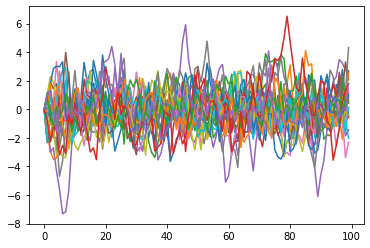

In [5]:
## Number of dimensions, number of edges, number of samples
T, n, s = 100, 25, 10

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
A_true = h.generate_A(n, s, tril = True, low = 0.25, high = 0.75)

## Second approach: A is not necessarily a DAG, possible model mismatch
# A_true = (np.array([0.0] * (n ** 2 - s) + [1.0] * s) * (2 * np.random.randint(0, 2, size=(n ** 2)) - 1) * np.random.uniform(low = 0.45, high = 0.55, size = n ** 2))

# shuffle for randomness
# np.random.shuffle(A_true)

# reshape
# A_true = A_true.reshape(n, n)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(A_true)):
    A_true[i][i] = np.random.uniform(0.25, 0.75)
    # A_true[i][i] = np.abs(A_true[i][i])

## True permutation
P_true = np.random.permutation(np.identity(n))

## Datagenerating W
W_true = P_true.T @ A_true @ P_true
print(f"True W:\n{np.round(W_true, 2)}.\n")

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

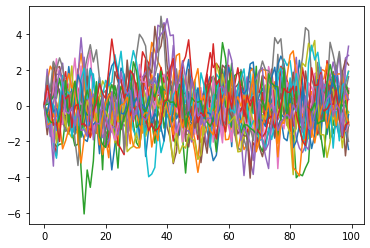

[[ 0.69  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.   -0.57  0.    0.    0.    0.
   0.  ]
 [ 0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.39  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.75  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.   -0.4   0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.4   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.29  0.37  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.33  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


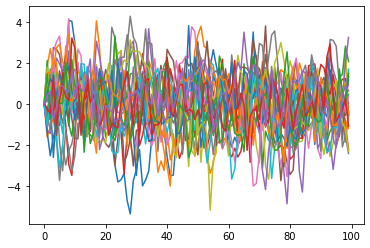

[[ 0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.66  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.49  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.6   0.    0.44  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.4   0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.49  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.5   0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


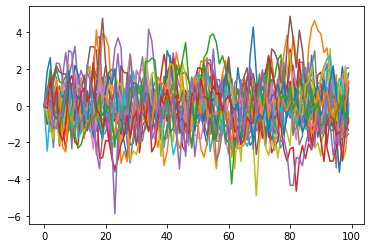

[[ 0.51  0.    0.    0.    0.    0.    0.    0.   -0.74  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.65  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.49  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.33  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.54  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.58  0.64  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.66  0.    0.    0.    0.    0.31  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


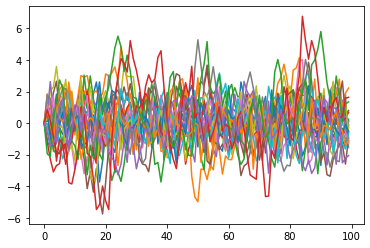

[[ 0.47  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.74  0.    0.    0.    0.    0.    0.    0.25  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.48  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.29  0.    0.    0.    0.    0.   -0.51  0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.74  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.   -0.37  0.    0.    0.    0.    0.56  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


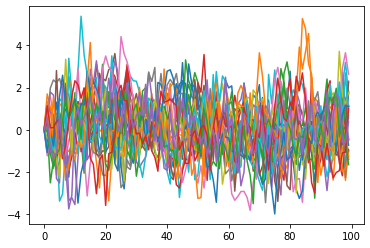

[[ 0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.41  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  -0.41  0.    0.    0.   -0.27  0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.57  0.45  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.47  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.47  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.36  0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.75  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.57  0.    0.    0.    0.   -0.61
   0.   

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


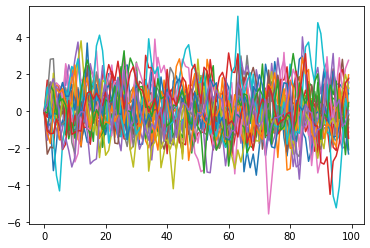

[[ 0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.38  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.26  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.   -0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.51  0.
   0.  ]
 [ 0.    0.    0.    0.38  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.32  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.28  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.61  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


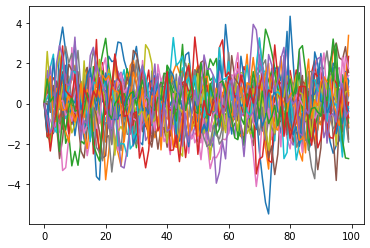

[[ 0.55  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.44  0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.46  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.59  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.37  0.    0.    0.    0.    0.    0.    0.38  0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.71  0.65  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.49  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


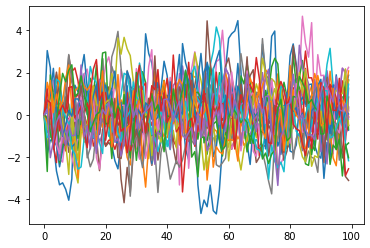

[[ 0.64  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.53  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.36  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.48  0.    0.    0.    0.   -0.34  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.34  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.75  0.    0.    0.    0.    0.45  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.56  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


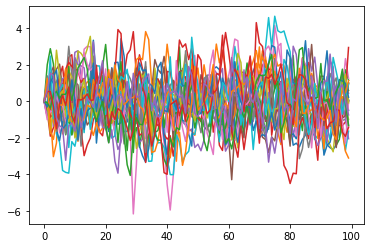

[[ 0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.43  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.62  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.43  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.65  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.43  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.35  0.    0.    0.   -0.47  0.    0.
   0.    0.    0.    0.   -0.52  0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.31  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


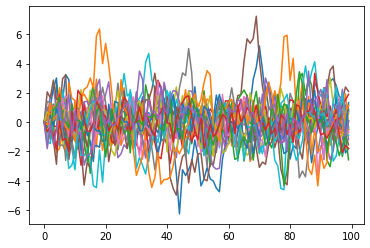

[[ 0.61  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.26  0.    0.    0.   -0.66  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.3   0.    0.    0.    0.    0.    0.    0.36  0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.3 ]
 [ 0.    0.    0.    0.5   0.    0.62  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.58  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.38  0.    0.    0.    0.    0.66  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.27  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


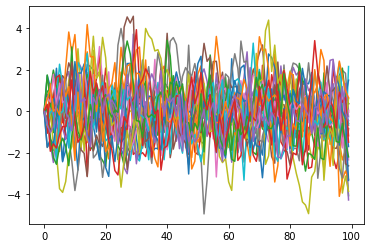

[[ 0.62  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.49  0.    0.    0.    0.63  0.    0.    0.58  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.64  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.26  0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.61  0.    0.    0.    0.    0.    0.    0.
   0.    0.51  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.52
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.34  0.    0.    0.    0.    0.
   0.   

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


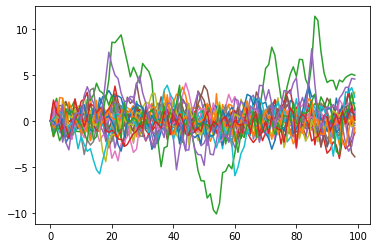

[[ 0.31  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.52  0.    0.   -0.47  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.39  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.74  0.    0.    0.    0.    0.    0.    0.    0.
   0.   -0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.52  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.34  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.62  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


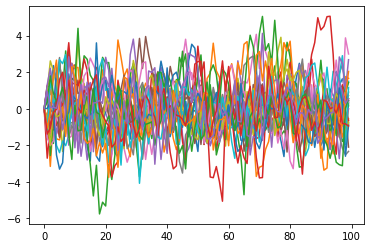

[[ 0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.   -0.26  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.69  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.62  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.51  0.    0.
   0.  ]
 [ 0.    0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.56  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.57  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.33  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


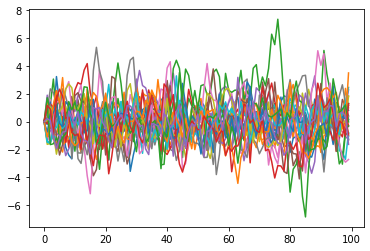

[[ 0.37  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  -0.73  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.61  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.34  0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.64  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.72  0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.38  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


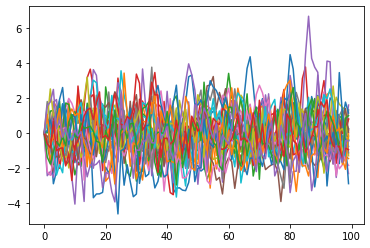

[[ 0.6   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.52  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.46  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.48  0.48  0.    0.    0.    0.    0.53  0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.28  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.74  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.32  0.    0.    0.    0.    0.67
   0.   

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


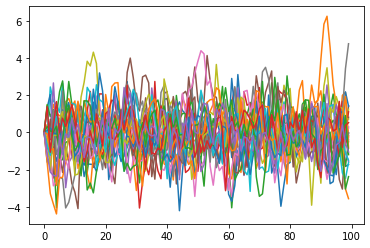

[[ 0.45  0.    0.    0.    0.    0.57  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.66  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.26 -0.62  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.33  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.64  0.    0.    0.    0.52  0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


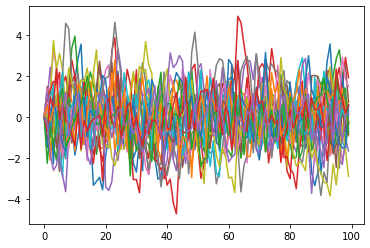

[[ 0.65  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.44  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.62  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.59  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.72  0.    0.    0.    0.    0.    0.    0.
   0.    0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.54  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.4   0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


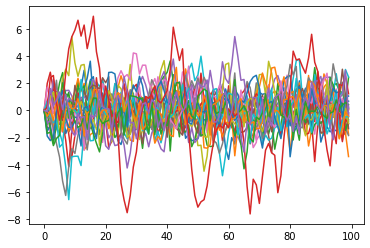

[[ 0.35  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.67  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.26  0.    0.    0.    0.    0.    0.   -0.69
   0.  ]
 [ 0.    0.    0.44  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.46  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.73  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.35  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.69  0.    0.    0.    0.    0.
   0.   

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


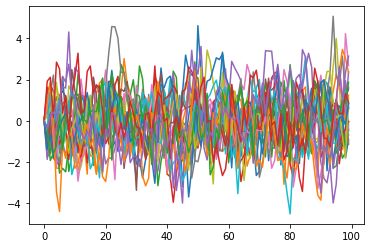

[[ 0.32  0.41  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.34  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.49  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.4
   0.  ]
 [ 0.    0.    0.    0.47  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.33  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.36  0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.63  0.    0.    0.    0.    0.
   0.    

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


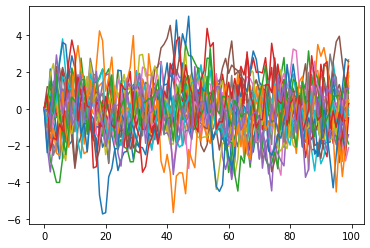

[[ 0.57  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.54  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.66  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.36  0.    0.66  0.    0.    0.    0.    0.    0.    0.
   0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.64  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


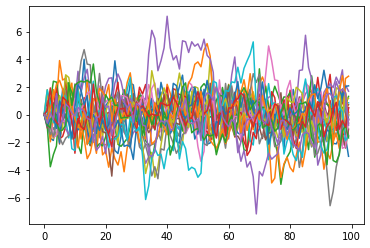

[[ 0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.61  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.43  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.   -0.72  0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.53  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.72  0.    0.    0.    0.    0.    0.55  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


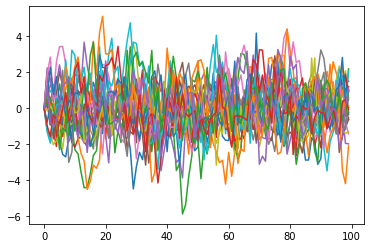

[[ 0.75  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.65  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.55  0.    0.    0.    0.    0.    0.    0.    0.    0.39
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.29  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.
   0.  ]
 [ 0.    0.    0.    0.    0.59  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.62  0.    0.    0.    0.    0.    0.68
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.73  0.    0.    0.    0.    0.
   0. 

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


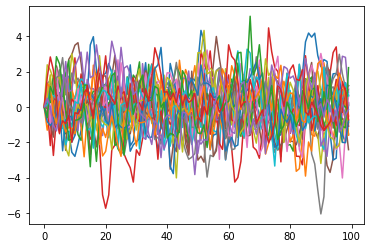

[[ 0.74  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.53  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.48  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.39  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.   -0.71  0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.57  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.3   0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


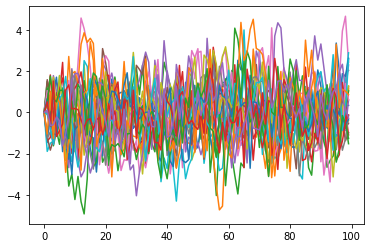

[[ 0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.53  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.27  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.46  0.    0.    0.    0.    0.    0.    0.
  -0.64  0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.47  0.
   0.  ]
 [ 0.63  0.    0.    0.    0.    0.43  0.    0.    0.33  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.59  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


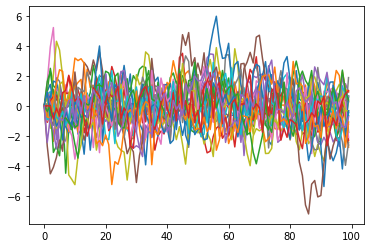

[[ 0.42  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.48
   0.  ]
 [ 0.    0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.45  0.    0.    0.    0.    0.    0.74  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.72  0.    0.    0.    0.   -0.3   0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.52  0.    0.    0.    0.    0.    0.57  0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.54  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.54  0.    0.    0.    0.    0.
   0.   

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


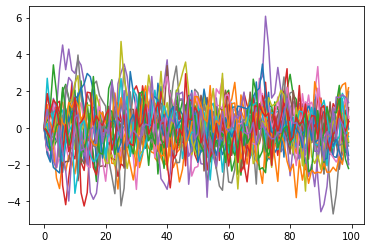

[[ 0.37  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.73  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.   -0.58  0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.43 -0.32  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.32  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.55  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.55  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.56  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


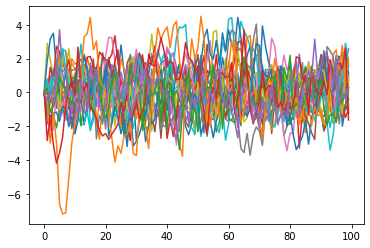

[[ 0.46  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.38  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.4   0.    0.    0.44  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.7
   0.  ]
 [ 0.    0.    0.    0.67  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.34  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.31  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.53  0.    0.    0.    0.    0.
   0.    

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


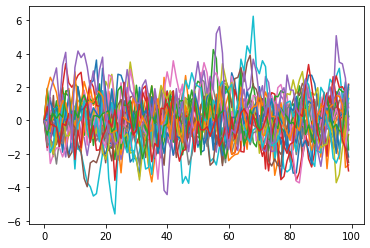

[[ 0.72  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.27  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.37  0.    0.    0.    0.    0.    0.    0.    0.
   0.74  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.43  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.53  0.    0.    0.    0.    0.42  0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.28  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


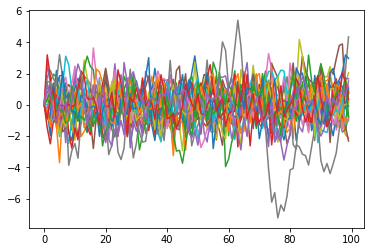

[[ 0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.53  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.38  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.51  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.42  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.35  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


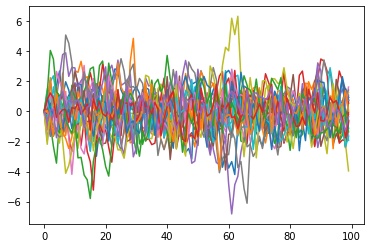

[[ 0.73  0.    0.    0.    0.57  0.    0.    0.    0.    0.    0.    0.
   0.   -0.27  0.    0.    0.    0.   -0.75  0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.51  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.52  0.
   0.  ]
 [ 0.    0.    0.45  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.75  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.45  0.    0.    0.53  0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.59  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.36  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


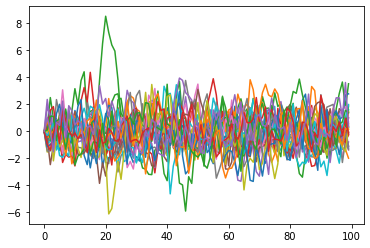

[[ 0.49  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.57  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.62  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.   -0.46  0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.41  0.    0.    0.54  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.   -0.55  0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.48  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.28  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.42  0.    0.62  0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.34  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


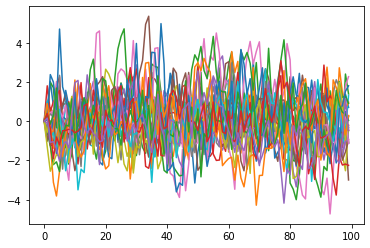

[[ 0.27  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.53  0.35  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.26  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.54  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.58  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.46  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


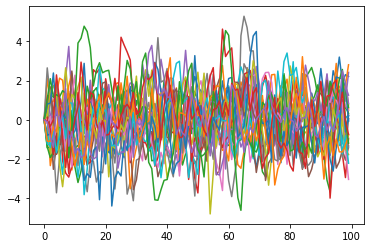

[[ 0.61  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.52  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.65  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.66  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.45  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.66  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.3   0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


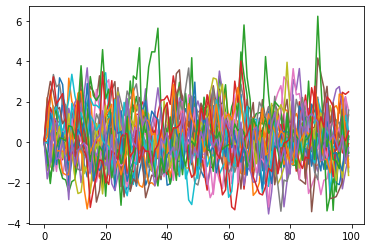

[[ 0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.69  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.26  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.69  0.    0.    0.    0.    0.    0.    0.    0.
   0.   -0.69  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.61  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.5   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.65  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


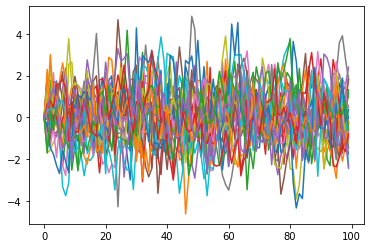

[[ 0.29  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.   -0.52  0.    0.    0.    0.
   0.  ]
 [ 0.    0.49  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.37  0.    0.    0.   -0.25  0.    0.    0.    0.
   0.    0.   -0.32  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.34  0.51  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.46  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.45  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


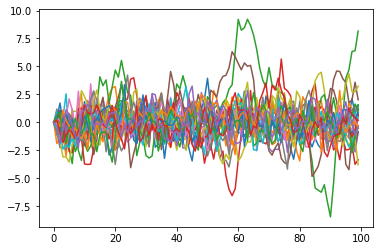

[[ 0.55  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.54  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.67  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.56  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.5   0.    0.    0.    0.51  0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.28  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


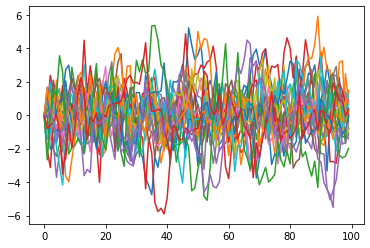

[[ 0.69  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.74  0.
   0.  ]
 [ 0.    0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.39  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.46  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.53  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.47  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.35  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


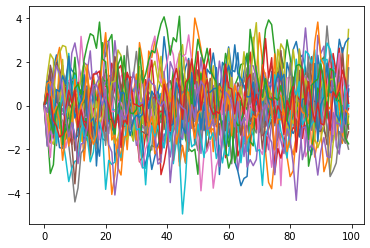

[[ 0.3   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.   -0.67  0.75  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  -0.25]
 [ 0.    0.    0.    0.45  0.    0.    0.    0.    0.    0.    0.48  0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.73  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.41  0.    0.    0.29  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.64  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


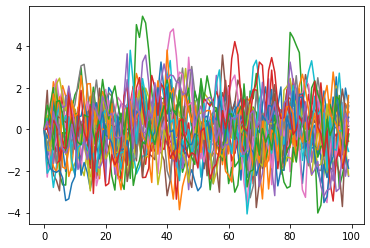

[[ 0.26  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.36  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.41  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.64  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.26  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.56  0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.39  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.53  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


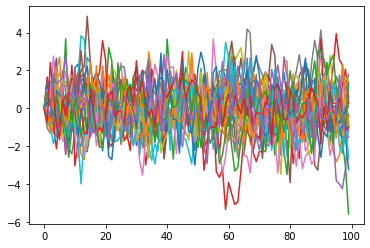

[[ 0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.35  0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.51  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.25  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.48  0.    0.    0.    0.    0.    0.    0.
   0.58  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.4   0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.55  0.    0.    0.    0.    0.
   0.   -0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


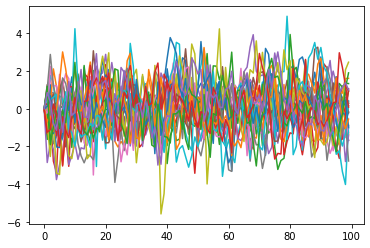

[[ 0.39  0.    0.    0.    0.    0.   -0.37  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.54  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.53  0.    0.    0.    0.    0.    0.   -0.59  0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.44  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.73  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.63  0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.64  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.39  0.    0.    0.73  0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


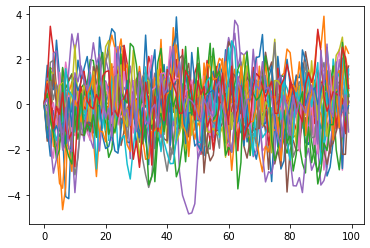

[[ 0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.3   0.    0.    0.    0.    0.    0.    0.   -0.71  0.
   0.  ]
 [ 0.    0.    0.64  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.4   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.   -0.67  0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.73  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.29  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


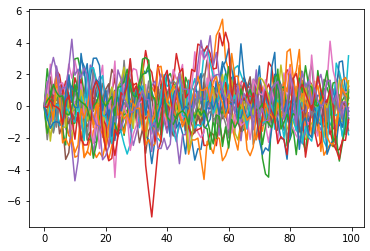

[[ 0.75  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.72  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.67  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.62  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.5   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.66  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.36  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


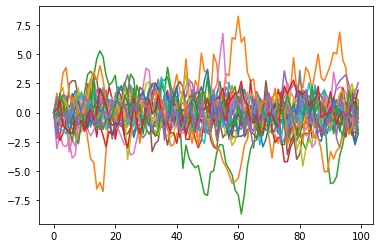

[[ 0.64  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.43  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.65  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.43  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.72  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


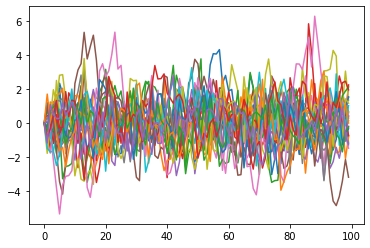

[[ 0.4   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.32  0.   -0.66  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.42  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.69  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.59  0.39  0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


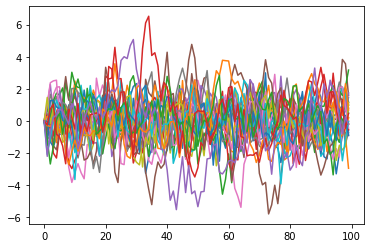

[[ 0.37  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.28  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.38  0.    0.    0.36  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.56  0.    0.    0.    0.    0.   -0.44  0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.71  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.75  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


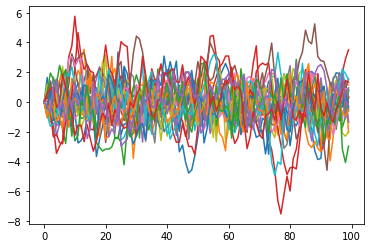

[[ 0.71  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.38  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.43  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.62  0.
   0.  ]
 [ 0.    0.    0.    0.63  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.43  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.67  0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.71  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.29  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


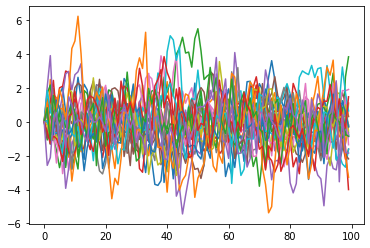

[[ 0.54  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.53  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.62  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.62  0.    0.    0.71  0.    0.   -0.31  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.71  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.72  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.4   0.    0.    0.    0.51  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


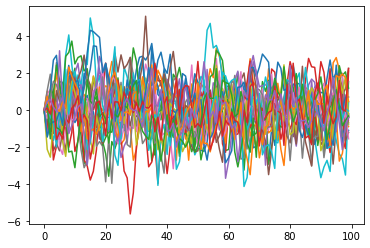

[[ 0.6   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.43  0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.46  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.34  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.59  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.56  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.36  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.4   0.    0.   -0.74  0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


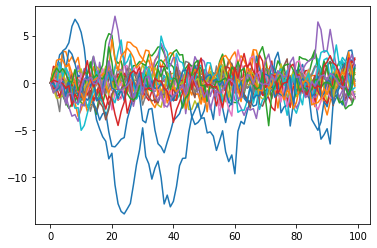

[[ 0.73  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.73  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.   -0.33  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.75  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.41  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.27  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.39  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.43  0.    0.    0.    0.    0.
   0.    0

C:\Users\s165048\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [9]:
# number of files to generate
misc = ""
N = 50

# create directory with n{number variables}_s{number edges}_T{number timesteps}_{misc}
name = f"n{n}_s{s}_T{T}_N_{N}_{misc}/"

path = f"C:/Users/s165048/OneDrive - TU Eindhoven/QuinceyFinalProject/final-project/data/generated_data/{name}"
os.mkdir(path)

for file_number in range(N):
    
    # generate W
    P = np.random.permutation(np.identity(n))
    A = h.generate_A(n, s, tril = True, low = 0.25, high = 0.75)
    
    for i in range(len(A_true)):
        A[i][i] = np.random.uniform(0.25, 0.75)
    
    W = P.T @ A @ P
    
    # generate X
    X = h.generate_var_2(T, n, A, P)
    
    # feedback, give W, plot X
    plt.plot(X);
    plt.show()
    
    print(np.round(W, 2))
    
    # Save results
    h.save_data(X, W, "", "", directory = f"/{name}/")